In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


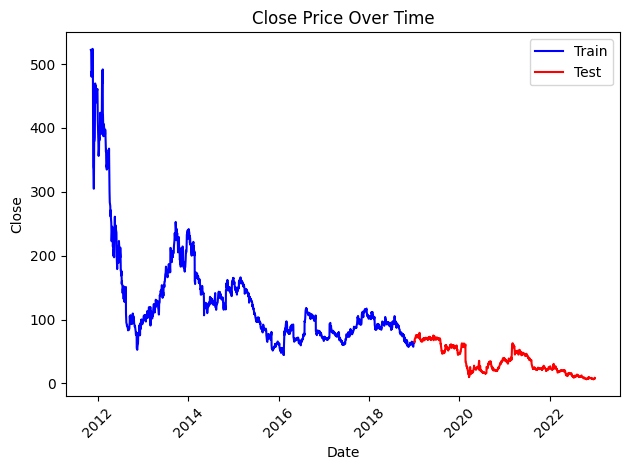

In [3]:
#AAPL
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GRPN',start_date,end_date,period,2019)
data.data_preprocess()

Running ring
Generation 1: Best fitness = 1.221855959341319  Average Fitness = 0.10767874767016691
Generation 2: Best fitness = 1.654354834780886  Average Fitness = 0.29477463461113007
Generation 3: Best fitness = 1.654354834780886  Average Fitness = 0.592150624865769
Generation 4: Best fitness = 1.7369105666157572  Average Fitness = 0.6911265422877564
Generation 5: Best fitness = 1.926174878765516  Average Fitness = 0.7727112209772959
Generation 6: Best fitness = 3.287971293065131  Average Fitness = 0.9167696489480058
Generation 7: Best fitness = 3.287971293065131  Average Fitness = 0.9313337490187372
Generation 8: Best fitness = 3.287971293065131  Average Fitness = 1.1119315208464808
Generation 9: Best fitness = 3.287971293065131  Average Fitness = 1.035722525704709
Generation 10: Best fitness = 3.287971293065131  Average Fitness = 1.080073713183535
Island 0 Migration -Left island 7 -Right island 1
Island 1 Migration -Left island 0 -Right island 2
Island 2 Migration -Left island 1 -R

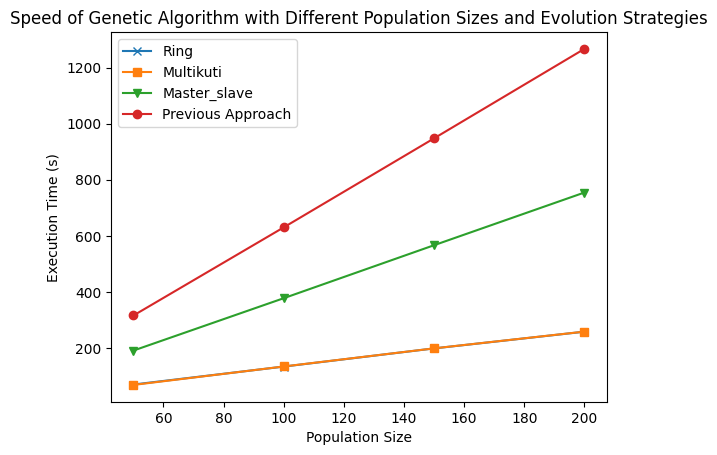

In [14]:
import matplotlib.pyplot as plt

pop_size = [ 50, 100,150,200]
evolve_strategy = ["ring", "multikuti", "master_slave", "gga"]

fitness_values = {strategy: {size: [] for size in pop_size} for strategy in evolve_strategy}
speed_values = {strategy: {size: [] for size in pop_size} for strategy in evolve_strategy}

for strategy in evolve_strategy:
    for size in pop_size:
        for j in range(20):
            start = time.time()
            ga = IslandGGA(data=data.train_data, num_islands=8, m_iter=10, num_iter=40, pSize=size,
                           r_cross=0.6, r_mut=0.1, strategies=data.strategies, evolve_strategy=strategy)
            ga.evolve()
            end = time.time()
            processing_time = end - start
            speed_values[strategy][size].append(processing_time)
            fitness_values[strategy][size].append(ga.globalBest.fitness_value)

# Plot the speed of the algorithm against the population size for each evolution strategy

# Define a dictionary of line styles for each strategy
# line_styles = ['o-', 'x-', 's-', 'D-', '^-', 'v-', '<-', '>-', '1-', '2-']
line_styles = {
    "gga": "o-",          # Previous Approach
    "ring": "x-",    # Replace "strategy2" with the actual strategy names
    "multikuti": "s-",    # Replace "strategy3" with the actual strategy names
    "master_slave":"v-"
}

for strategy in evolve_strategy:
    if strategy in line_styles:
        l = "Previous Approach" if strategy == "gga" else strategy.capitalize()
        plt.plot(pop_size, [sum(speed_values[strategy][size]) / len(speed_values[strategy][size]) for size in pop_size], line_styles[strategy], label=l)

plt.xlabel('Population Size')
plt.ylabel('Execution Time (s)')
plt.title('Speed of Genetic Algorithm with Different Population Sizes and Evolution Strategies')
plt.legend()
plt.show()





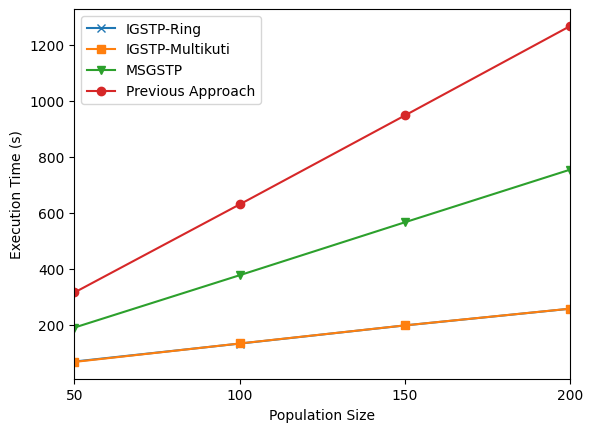

In [27]:
line_styles = {
    "gga": "o-",          # Previous Approach
    "ring": "x-",    # Replace "strategy2" with the actual strategy names
    "multikuti": "s-",    # Replace "strategy3" with the actual strategy names
    "master_slave":"v-"
}

for strategy in evolve_strategy:
    if strategy in line_styles:
        if strategy == 'gga':
            l = "Previous Approach" 
        elif strategy =='ring':
            l= "IGSTP-Ring"
        elif strategy == "multikuti":
            l= "IGSTP-Multikuti"
        else:
            l= "MSGSTP"
        plt.plot(pop_size, [sum(speed_values[strategy][size]) / len(speed_values[strategy][size]) for size in pop_size], line_styles[strategy], label=l)

plt.xlabel('Population Size')
plt.ylabel('Execution Time (s)')
#plt.title('Speed of Genetic Algorithm with Different Population Sizes and Evolution Strategies')
plt.legend()

# Set x-axis limits and ticks
plt.xlim(50, 200)  # Adjust these limits according to your data
plt.xticks(range(50, 201, 50))  # This will set ticks at intervals of 50 from 50 to 300

plt.show()

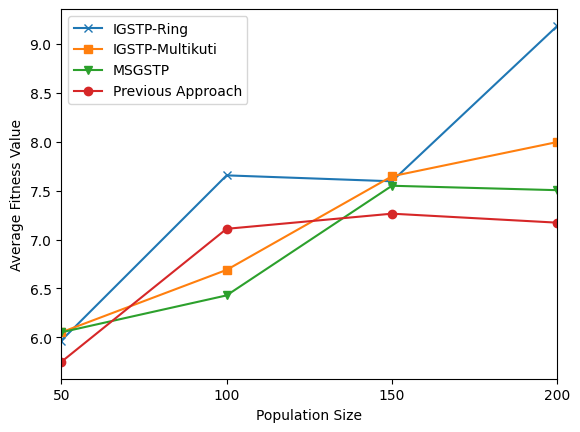

In [28]:


for strategy in evolve_strategy:
    if strategy in line_styles:
        if strategy == 'gga':
            l = "Previous Approach" 
        elif strategy =='ring':
            l= "IGSTP-Ring"
        elif strategy == "multikuti":
            l= "IGSTP-Multikuti"
        else:
            l= "MSGSTP"
        plt.plot(pop_size, [sum(fitness_values[strategy][size]) / len(fitness_values[strategy][size]) for size in pop_size], line_styles[strategy], label=l)

plt.xlabel('Population Size')
plt.ylabel('Average Fitness Value')
#plt.title('Speed of Genetic Algorithm with Different Population Sizes and Evolution Strategies')
plt.legend()
# Set x-axis limits and ticks
plt.xlim(50, 200)  # Adjust these limits according to your data
plt.xticks(range(50, 201, 50))  # This will set ticks at intervals of 50 from 50 to 300

plt.show()

In [16]:
file_name = "pop_size_speed_values"
np.save(file_name, speed_values)

In [19]:
file_name = "pop_size_fitness_values"
np.save(file_name, speed_values)